# Procesamiento Lenguaje Natural (NLP) IV

## Análisis Sintáctico

```{admonition} ¿Qué es el Análisis Sintáctico?
<div align="justify">El análisis sintáctico (o parsing) implica analizar la estructura gramatical de una oración para entender las relaciones entre las palabras.</div>
```

```{warning}
<div align="justify">NLTK no permite realizar este tipo de análisis con textos en español, solo en inglés y ruso (Currently, NLTK pos_tag only supports English and Russian),  por lo cual ocuparemos otra librería que es spaCY.</div>
```

### Etiquetado de Partes del Discurso (POS Tagging)

```{admonition} ¿Qué es el Etiquetado de Partes del Discurso (POS Tagging)?
<div align="justify">Es la asignación de etiquetas gramaticales a cada palabra en una oración, como sustantivos, verbos, adjetivos, etc.</div>
```

```{table} Listado básico de etiquetas POS
:name: my-table-ref

| Etiqueta POS |         Descripción         |
|:------------:|:--------------------------:|
|     ADJ      |          Adjetivo           |
|     ADP      | Adposición (preposición y postposición) |
|     ADV      |          Adverbio           |
|     AUX      |        Verbo auxiliar       |
|    CONJ      |         Conjunción          |
|     DET      |        Determinante        |
|    INTJ      |        Interjección         |
|    NOUN      |         Sustantivo          |
|     NUM      |           Número            |
|    PART      |          Partícula          |
|    PRON      |          Pronombre          |
|    PROPN     |        Nombre propio        |
|    PUNCT     |    Signo de puntuación      |
|   SCONJ      | Conjunción subordinante     |
|    SYM       |          Símbolo            |
|    VERB      |            Verbo            |
|      X       |            Otro             |

```

#### Ejemplo de Código de POS Tagging

In [11]:
import spacy

# Cargar el modelo preentrenado en español
nlp = spacy.load('es_core_news_sm')

# Texto de ejemplo en español
texto = "Steve dio un emotivo discurso en la Universidad de Stanford."

# Procesar el texto con Spacy
doc = nlp(texto)

# Etiquetar las partes del discurso (POS Tagging) en español
etiquetas_pos = [(token.text, token.pos_) for token in doc]

print("Etiquetado de Partes del Discurso (POS Tagging) en Español:")
print(etiquetas_pos)

Etiquetado de Partes del Discurso (POS Tagging) en Español:
[('Steve', 'PROPN'), ('dio', 'VERB'), ('un', 'DET'), ('emotivo', 'ADJ'), ('discurso', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('Universidad', 'PROPN'), ('de', 'ADP'), ('Stanford', 'PROPN'), ('.', 'PUNCT')]


### Reconocimiento de Entidades Nombradas (NER)

```{admonition} ¿Qué es el Reconocimiento de Entidades Nombradas (NER)?
<div align="justify">El objetivo primordial es procesar datos estructurados y no estructurados y clasificar estas entidades nombradas en categorías predefinidas. Algunas categorías comunes incluyen nombre, ubicación, empresa, tiempo, valores monetarios, eventos y más.Todo esto es  útil en aplicaciones de análisis de sentimiento, extracción de información, resumen de texto, entre otros.</div>
```

#### Ejemplo de Código de NER

In [12]:
import spacy

# Cargar el modelo preentrenado en español
nlp = spacy.load('es_core_news_sm')

# Texto de ejemplo en español
texto = "Steve dio un emotivo discurso en la Universidad de Stanford."

# Procesar el texto con Spacy
doc = nlp(texto)

# Reconocimiento de Entidades Nombradas (NER) en español
entidades_nombradas = [(entity.text, entity.label_) for entity in doc.ents]

print("Reconocimiento de Entidades Nombradas (NER) en Español:")
print(entidades_nombradas)


Reconocimiento de Entidades Nombradas (NER) en Español:
[('Steve', 'PER'), ('Universidad de Stanford', 'ORG')]


### Visualización del Análisis Sintáctico

In [25]:
import spacy
from spacy import displacy

# Cargar el modelo de SpaCy en español
nlp = spacy.load('es_core_news_sm')

# Ejemplo de frase para análisis sintáctico
frase_ejemplo = "Steve Jobs dio un emotivo discurso en la Universidad de Stanford."

# Procesar la frase con SpaCy
doc = nlp(frase_ejemplo)

# Mostrar árbol de dependencia
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})


## Análisis Semántico

```{admonition} ¿Qué es el Análisis Sintáctico?
<div align="justify">El análisis sintáctico (o parsing) implica analizar la estructura gramatical de una oración para entender las relaciones entre las palabras.</div>
```

### Desambiguación del sentido de las Palabras:

```{admonition} ¿Qué es la Desambiguación de Palabras?
<div align="justify">La desambiguación de palabras se refiere a determinar el significado correcto de una palabra que tiene múltiples sentidos en un contexto específico. Esto se puede lograr utilizando algoritmos de desambiguación léxica o basados en corpus.</div>
```

#### Ejemplo de Código de Desambiguación de Palabras

In [21]:
from nltk.corpus import wordnet
from nltk.wsd import lesk

# Definir el contexto de la palabra
frase =  """
Fue imposible preverlo todo en la vida. 
Si te atreves a conectar los puntos hacia adelante, 
de alguna manera, en el futuro, confiarás en algo: en tu karma, 
en el destino, en la vida, en el destino, en las personas, lo que sea.
"""
# Obtener la palabra objetivo
target_word = 'destino'

# Aplicar Lesk algorithm para desambiguar
synset = lesk(frase.split(), target_word)

# Verificar si se encontró un synset adecuado
if synset is not None:
    # Mostrar resultado
    print(f'Palabra: {target_word}')
    print(f'Significado: {synset.definition()}')
else:
    print(f"No se encontró un sentido adecuado para '{target_word}' en el contexto proporcionado.")


No se encontró un sentido adecuado para 'destino' en el contexto proporcionado.


### Extracción de Relaciones: 

```{admonition} ¿Qué es la Extracción de Relaciones?
<div align="justify"> Esta implica identificar conexiones semánticas o sintácticas entre entidades en el texto, como relaciones de hiponimia, hiperonimia, causa-efecto, etc.</div>
```

#### Ejemplo de Código de Extracción de Relaciones: 

In [20]:
import spacy

# Cargar el modelo en español de Spacy
nlp = spacy.load('es_core_news_sm')

# Definir la frase
frase = "Fue imposible preverlo todo en la vida. Si te atreves a conectar los puntos hacia adelante, de alguna manera, en el futuro, confiarás en algo: en tu karma, en el destino, en la vida, en el destino, en las personas, lo que sea."

# Procesar la frase con Spacy
doc = nlp(frase)

# Mostrar entidades nombradas y sus roles sintácticos
print("Entidades y roles sintácticos:")
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_}) - Dependencia: {ent.root.dep_}")

# Mostrar dependencias sintácticas de todas las palabras en la frase
print("\nDependencias sintácticas:")
for token in doc:
    print(f"{token.text} - Dependencia: {token.dep_}, Parte del discurso: {token.pos_}")


Entidades y roles sintácticos:
Si te atreves a conectar (MISC) - Dependencia: ROOT

Dependencias sintácticas:
Fue - Dependencia: cop, Parte del discurso: AUX
imposible - Dependencia: ROOT, Parte del discurso: ADJ
preverlo - Dependencia: csubj, Parte del discurso: VERB
todo - Dependencia: obj, Parte del discurso: PRON
en - Dependencia: case, Parte del discurso: ADP
la - Dependencia: det, Parte del discurso: DET
vida - Dependencia: obl, Parte del discurso: NOUN
. - Dependencia: punct, Parte del discurso: PUNCT
Si - Dependencia: mark, Parte del discurso: SCONJ
te - Dependencia: iobj, Parte del discurso: PRON
atreves - Dependencia: ROOT, Parte del discurso: VERB
a - Dependencia: mark, Parte del discurso: ADP
conectar - Dependencia: xcomp, Parte del discurso: VERB
los - Dependencia: det, Parte del discurso: DET
puntos - Dependencia: obj, Parte del discurso: NOUN
hacia - Dependencia: case, Parte del discurso: ADP
adelante - Dependencia: advmod, Parte del discurso: ADV
, - Dependencia: punct,

### Visualización del Análisis Semántico

<div align="justify">Para visualizar aspectos del análisis semántico en un texto, podemos utilizar herramientas como WordClouds (nubes de palabras), gráficos de dispersión de palabras clave, o incluso representaciones vectoriales para capturar similitudes semánticas entre palabras.<div>

<div align="justify"><strong> Uso de WordCloud</strong>: La que muestra las palabras más frecuentes en un texto, donde el tamaño de cada palabra representa su frecuencia de aparición. Esto puede ofrecer insights sobre los temas principales del texto.<div>

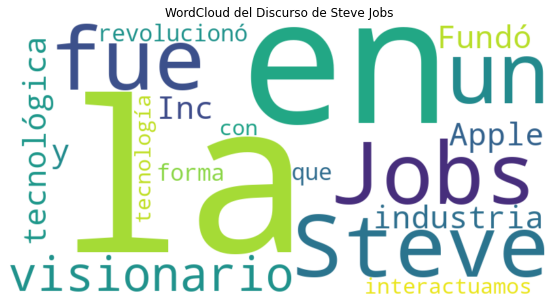

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto de ejemplo
texto_ejemplo = "Steve Jobs fue un visionario en la industria tecnológica. Fundó Apple Inc. y revolucionó la forma en que interactuamos con la tecnología."

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_ejemplo)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud del Discurso de Steve Jobs')
plt.show()


<div align="justify"><strong> Representaciones Vectoriales (word embeddings)</strong>: Estas permiten capturar relaciones semánticas entre palabras, donde palabras similares en significado estarán más cerca en el espacio vectorial. Si bien,  la generación de embeddings necesita entrenamiento previo con grandes corpus de texto, aquí hau un ejemplo básico utilizando SpaCy para obtener representaciones vectoriales de las palbaras identificadas en la nube de palabras usada previamente.<div>

In [31]:
import spacy

# Cargar el modelo de SpaCy en español
nlp = spacy.load('es_core_news_sm')

# Obtener representaciones vectoriales de palabras
palabras = ['Steve', 'Jobs', 'Apple', 'tecnología']

for palabra in palabras:
    token = nlp(palabra)
    print(f"Palabra: {palabra}")
    print(f"Vector semántico:\n{token.vector}\n")


Palabra: Steve
Vector semántico:
[ 1.6954226   2.3852992  -1.0479419  -2.9150121  -2.854951    3.800932
 -0.32780194 -2.309936    3.0529099   4.1016216  -1.27048     3.074584
  1.1750889   0.2949464   7.51592     3.4882426  -4.5924187   2.6013188
  1.3942841  -4.3961887   6.8055124   5.9939337   3.664003    2.190405
 -1.4196005  -1.2751667  -1.648981   -0.3215012   2.804182   -0.6037993
 -0.65419424 -3.0755937   2.7570825  -1.7890725   0.65946954  1.8246825
  0.92358595 -2.8761601   3.0070329  -2.9747021   0.35725754 -1.7793069
 -1.0772322   3.41704    -0.45815736 -0.22805336 -3.3319836  -8.070787
 -7.6126046  -1.1886644   0.39562356 -2.973638   -1.0722961   2.242342
 -3.4962387   5.296127    2.786405    4.6123953   0.9465897  -3.6371865
 -1.2877402  -4.170164   -0.0182128  -0.6144998  -2.6872876   0.52657396
 -2.408743   -2.2806253  -3.517282   -2.7071846   2.8647394   0.2392014
 -0.5543735   7.39874     0.36842912 -1.8763452   0.6665422   2.7230902
 -1.81835    -1.5710523  -3.926563 

## Aplicación de Análisis Sintáctico y Semántico

In [22]:
import spacy

# Cargar el modelo en español de Spacy
nlp = spacy.load('es_core_news_sm')

# Cargar el texto del archivo
file_path = 'Discurso de Steve Jobs.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    speech = file.read()

# Procesar el texto con Spacy
doc = nlp(speech)

# Mostrar las entidades nombradas y sus tipos
print("Entidades Nombradas:")
for ent in doc.ents:
    print(f"{ent.text} - Tipo: {ent.label_}")

# Mostrar las dependencias sintácticas y las partes del discurso
print("\nDependencias sintácticas y partes del discurso:")
for token in doc[:10]:  # Mostrar solo los primeros 10 tokens por brevedad
    print(f"{token.text} - Dependencia: {token.dep_}, Parte del discurso: {token.pos_}")


Entidades Nombradas:
Steve Jobs - Tipo: PER
Stanford - Tipo: MISC
Me siento - Tipo: MISC
Yo nunca llegué a licenciarme - Tipo: MISC
De hecho - Tipo: MISC
No es gran cosa - Tipo: MISC
Solo tres historias - Tipo: MISC
La primera historia - Tipo: MISC
Me retiré del Reed College - Tipo: MISC
¿Por qué lo dejé? - Tipo: MISC
Todo empezó - Tipo: MISC
Mi madre biológica - Tipo: MISC
Ella creía firmemente - Tipo: MISC
Por lo tanto - Tipo: MISC
Sin embargo - Tipo: MISC
De ese modo mis padres - Tipo: MISC
¿ - Tipo: MISC
Ellos - Tipo: MISC
“ - Tipo: MISC
Cuando mi madre biológica - Tipo: MISC
Solo cambió de parecer - Tipo: MISC
Ingenuamente - Tipo: PER
Stanford - Tipo: ORG
Seis meses después - Tipo: MISC
No tenía idea - Tipo: MISC
Y ahí estaba yo gastándome - Tipo: MISC
Decidí - Tipo: PER
Ese momento fue aterrador - Tipo: MISC
Al dejar los estudios - Tipo: MISC
No tenía dormitorio - Tipo: MISC
Coca Cola - Tipo: PER
Hare Krishna - Tipo: ORG
Me gustaba - Tipo: MISC
Y gran parte de lo que encontré - T